In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [53]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.alpha = 1.1e-8
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1+self.e)
        self.v[1] = np.sqrt( self.G*(1-self.e)/(self.a_*(1.+self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r

        
        
    def GetAceleration(self):

        d = np.linalg.norm(self.r)
        self.a = (-self.G/d**3)*self.r*(1+self.alpha/np.square(d))

        return self.a
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt + 0.5*self.a*self.dt**2
        else:
            
            # rp pasado, r presente rf futuro ***revisar verlet self.v***
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            d = np.linalg.norm(self.rf)
            self.af = (-self.G/d**3)*self.rf*(1+self.alpha/np.square(d))
            self.v = self.v + 0.5 * (self.a + self.GetAceleration()) * self.dt
            
            self.a = self.af
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        angle = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
                angle.append(np.abs(np.arctan2(self.R[i][1], self.R[i][0])*180/np.pi))      

            
        return timeup, angle

In [54]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.205630,0.387098,t)
    
    return [Mercurio]

In [55]:
def RunSimulation(t,Planetas):
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
    return Planetas

In [56]:
dt = 1e-6
tmax = 2.5
t = np.arange(0., tmax, dt)
Planetas = GetPlanetas(t)
Planetas = RunSimulation(t, Planetas)


Running simulation:   0%|          | 0/2500000 [00:00<?, ? Steps/s]

Running simulation: 100%|██████████| 2500000/2500000 [02:36<00:00, 15996.03 Steps/s]


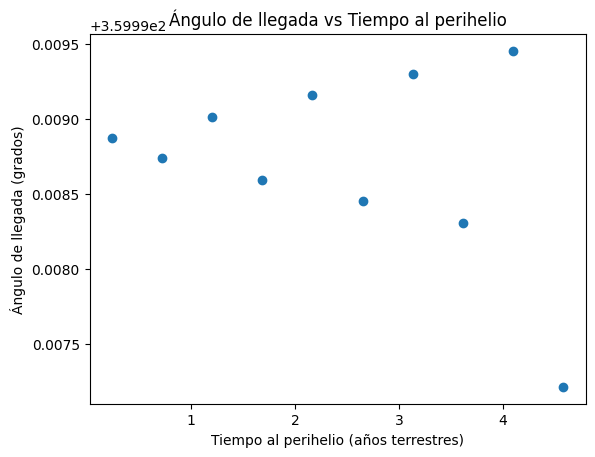

([0.240842,
  0.7225239999999999,
  1.204208,
  1.6858899999999999,
  2.167574,
  2.649256,
  3.13094,
  3.612622,
  4.094306,
  4.57599],
 [359.99887602614064,
  359.9987368809009,
  359.99901438143434,
  359.9985953456389,
  359.999157266902,
  359.9984516565511,
  359.9993031470391,
  359.99830395586196,
  359.9994538502817,
  359.99721150744256])

In [58]:
# Obtener tiempo y ángulo de llegada al perihelio de Mercurio
perihelio_time, angle = Planetas[0].GetPerihelio()
perihelio_time2 = []
angle2 = []
for i in range(len(perihelio_time)):
    perihelio_time2.append(perihelio_time[i]*2)
    angle2.append(angle[i]*2)
    

plt.plot(perihelio_time2, angle2, 'o')
plt.xlabel('Tiempo al perihelio (años terrestres)')
plt.ylabel('Ángulo de llegada (grados)')
plt.title('Ángulo de llegada vs Tiempo al perihelio')
plt.show()

perihelio_time2, angle2